In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict
from sklearn import metrics
import os
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn import preprocessing

In [2]:
data = pd.read_csv("data.csv")
#Dataset for breast cancer.

In [3]:
data.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave_points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave_points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave_points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'Unnamed:32'],
      dtype='object')

In [4]:
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,symmetry_worst,fractal_dimension_worst,Unnamed:32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
id                         569 non-null int64
diagnosis                  569 non-null object
radius_mean                569 non-null float64
texture_mean               569 non-null float64
perimeter_mean             569 non-null float64
area_mean                  569 non-null float64
smoothness_mean            569 non-null float64
compactness_mean           569 non-null float64
concavity_mean             569 non-null float64
concave_points_mean        569 non-null float64
symmetry_mean              569 non-null float64
fractal_dimension_mean     569 non-null float64
radius_se                  569 non-null float64
texture_se                 569 non-null float64
perimeter_se               569 non-null float64
area_se                    569 non-null float64
smoothness_se              569 non-null float64
compactness_se             569 non-null float64
concavity_se               569 non

In [6]:
data.diagnosis.unique()

array(['M', 'B'], dtype=object)

In [7]:
data.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,symmetry_worst,fractal_dimension_worst,Unnamed:32
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,0.0
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,NaN
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,NaN
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,NaN
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,NaN
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,NaN
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,NaN
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,NaN


In [8]:
data.diagnosis = data.diagnosis.map({'M':1, 'B':0})

In [9]:
data.diagnosis.unique()

array([1, 0])

In [10]:
data.drop(['id','Unnamed:32'], inplace=True, axis=1)

In [11]:
data.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [12]:
data_scaled = pd.DataFrame(preprocessing.scale(data.iloc[:,1:32])) #we are skipping the diagnosis column

In [13]:
data_scaled.head()

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
0,1.097064,-2.073335,1.269934,0.984375,1.568466,3.283515,2.652874,2.532475,2.217515,2.255747,...,1.886690,-1.359293,2.303601,2.001237,1.307686,2.616665,2.109526,2.296076,2.750622,1.937015
1,1.829821,-0.353632,1.685955,1.908708,-0.826962,-0.487072,-0.023846,0.548144,0.001392,-0.868652,...,1.805927,-0.369203,1.535126,1.890489,-0.375612,-0.430444,-0.146749,1.087084,-0.243890,0.281190
2,1.579888,0.456187,1.566503,1.558884,0.942210,1.052926,1.363478,2.037231,0.939685,-0.398008,...,1.511870,-0.023974,1.347475,1.456285,0.527407,1.082932,0.854974,1.955000,1.152255,0.201391
3,-0.768909,0.253732,-0.592687,-0.764464,3.283553,3.402909,1.915897,1.451707,2.867383,4.910919,...,-0.281464,0.133984,-0.249939,-0.550021,3.394275,3.893397,1.989588,2.175786,6.046041,4.935010
4,1.750297,-1.151816,1.776573,1.826229,0.280372,0.539340,1.371011,1.428493,-0.009560,-0.562450,...,1.298575,-1.466770,1.338539,1.220724,0.220556,-0.313395,0.613179,0.729259,-0.868353,-0.397100


In [14]:
data_scaled.columns = list(data.iloc[:,1:32].columns)

In [15]:
data_scaled['diagnosis'] = data['diagnosis']

In [16]:
data_scaled.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,symmetry_mean,fractal_dimension_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,symmetry_worst,fractal_dimension_worst,diagnosis
0,1.097064,-2.073335,1.269934,0.984375,1.568466,3.283515,2.652874,2.532475,2.217515,2.255747,...,-1.359293,2.303601,2.001237,1.307686,2.616665,2.109526,2.296076,2.750622,1.937015,1
1,1.829821,-0.353632,1.685955,1.908708,-0.826962,-0.487072,-0.023846,0.548144,0.001392,-0.868652,...,-0.369203,1.535126,1.890489,-0.375612,-0.430444,-0.146749,1.087084,-0.243890,0.281190,1
2,1.579888,0.456187,1.566503,1.558884,0.942210,1.052926,1.363478,2.037231,0.939685,-0.398008,...,-0.023974,1.347475,1.456285,0.527407,1.082932,0.854974,1.955000,1.152255,0.201391,1
3,-0.768909,0.253732,-0.592687,-0.764464,3.283553,3.402909,1.915897,1.451707,2.867383,4.910919,...,0.133984,-0.249939,-0.550021,3.394275,3.893397,1.989588,2.175786,6.046041,4.935010,1
4,1.750297,-1.151816,1.776573,1.826229,0.280372,0.539340,1.371011,1.428493,-0.009560,-0.562450,...,-1.466770,1.338539,1.220724,0.220556,-0.313395,0.613179,0.729259,-0.868353,-0.397100,1


In [17]:
data_scaled.describe()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,symmetry_mean,fractal_dimension_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,symmetry_worst,fractal_dimension_worst,diagnosis
count,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,...,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,569.000000
mean,-1.256562e-16,1.049736e-16,-1.272171e-16,-1.900452e-16,1.490704e-16,2.544342e-16,-1.338511e-16,-8.429110e-17,2.081912e-16,5.408679e-16,...,-1.834112e-17,-4.015534e-16,-2.848727e-17,-2.189227e-16,-2.579464e-16,1.143393e-16,2.829215e-16,1.670212e-16,2.321908e-16,0.372583
std,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,...,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,0.483918
min,-2.029648e+00,-2.229249e+00,-1.984504e+00,-1.454443e+00,-3.112085e+00,-1.610136e+00,-1.114873e+00,-1.261820e+00,-2.744117e+00,-1.819865e+00,...,-2.223994e+00,-1.693361e+00,-1.222423e+00,-2.682695e+00,-1.443878e+00,-1.305831e+00,-1.745063e+00,-2.160960e+00,-1.601839e+00,0.000000
25%,-6.893853e-01,-7.259631e-01,-6.919555e-01,-6.671955e-01,-7.109628e-01,-7.470860e-01,-7.437479e-01,-7.379438e-01,-7.032397e-01,-7.226392e-01,...,-7.486293e-01,-6.895783e-01,-6.421359e-01,-6.912304e-01,-6.810833e-01,-7.565142e-01,-7.563999e-01,-6.418637e-01,-6.919118e-01,0.000000
50%,-2.150816e-01,-1.046362e-01,-2.359800e-01,-2.951869e-01,-3.489108e-02,-2.219405e-01,-3.422399e-01,-3.977212e-01,-7.162650e-02,-1.782793e-01,...,-4.351564e-02,-2.859802e-01,-3.411812e-01,-4.684277e-02,-2.695009e-01,-2.182321e-01,-2.234689e-01,-1.274095e-01,-2.164441e-01,0.000000
75%,4.693926e-01,5.841756e-01,4.996769e-01,3.635073e-01,6.361990e-01,4.938569e-01,5.260619e-01,6.469351e-01,5.307792e-01,4.709834e-01,...,6.583411e-01,5.402790e-01,3.575891e-01,5.975448e-01,5.396688e-01,5.311411e-01,7.125100e-01,4.501382e-01,4.507624e-01,1.000000
max,3.971288e+00,4.651889e+00,3.976130e+00,5.250529e+00,4.770911e+00,4.568425e+00,4.243589e+00,3.927930e+00,4.484751e+00,4.910919e+00,...,3.885905e+00,4.287337e+00,5.930172e+00,3.955374e+00,5.112877e+00,4.700669e+00,2.685877e+00,6.046041e+00,6.846856e+00,1.000000


In [18]:
#looking at the number of patients with Malignant and Benign Tumor 


Text(0.5,1,'Diagnosis')

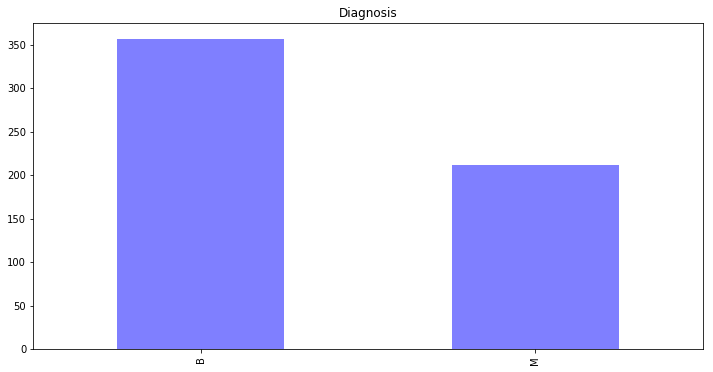

In [19]:
data_scaled.diagnosis.value_counts().plot(kind='bar', alpha = 0.5, facecolor = 'b', figsize = (12,6))
plt.xticks([0, 1], ["B", "M"])
plt.title("Diagnosis")

In [20]:
data_scaled.columns

Index(['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean',
       'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave_points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave_points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave_points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'diagnosis'],
      dtype='object')

In [21]:
data_mean_list = [x for x in data_scaled.columns if 'mean'in x]

In [22]:
data_mean = data_scaled[data_mean_list]

In [23]:
data_mean.corr(method="pearson")

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,symmetry_mean,fractal_dimension_mean
radius_mean,1.000000,0.323782,0.997855,0.987357,0.170581,0.506124,0.676764,0.822529,0.147741,-0.311631
texture_mean,0.323782,1.000000,0.329533,0.321086,-0.023389,0.236702,0.302418,0.293464,0.071401,-0.076437
perimeter_mean,0.997855,0.329533,1.000000,0.986507,0.207278,0.556936,0.716136,0.850977,0.183027,-0.261477
area_mean,0.987357,0.321086,0.986507,1.000000,0.177028,0.498502,0.685983,0.823269,0.151293,-0.283110
smoothness_mean,0.170581,-0.023389,0.207278,0.177028,1.000000,0.659123,0.521984,0.553695,0.557775,0.584792
compactness_mean,0.506124,0.236702,0.556936,0.498502,0.659123,1.000000,0.883121,0.831135,0.602641,0.565369
concavity_mean,0.676764,0.302418,0.716136,0.685983,0.521984,0.883121,1.000000,0.921391,0.500667,0.336783
concave_points_mean,0.822529,0.293464,0.850977,0.823269,0.553695,0.831135,0.921391,1.000000,0.462497,0.166917
symmetry_mean,0.147741,0.071401,0.183027,0.151293,0.557775,0.602641,0.500667,0.462497,1.000000,0.479921
fractal_dimension_mean,-0.311631,-0.076437,-0.261477,-0.283110,0.584792,0.565369,0.336783,0.166917,0.479921,1.000000


In [24]:
data_mean.corr(method="kendall")

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,symmetry_mean,fractal_dimension_mean
radius_mean,1.000000,0.229159,0.963320,0.985565,0.099549,0.340020,0.465087,0.566917,0.081502,-0.246220
texture_mean,0.229159,1.000000,0.234353,0.230829,0.017135,0.184220,0.236079,0.209629,0.075493,-0.039255
perimeter_mean,0.963320,0.234353,1.000000,0.956965,0.122434,0.375540,0.497587,0.596716,0.101781,-0.214661
area_mean,0.985565,0.230829,0.956965,1.000000,0.092541,0.333534,0.461843,0.561760,0.076963,-0.252131
smoothness_mean,0.099549,0.017135,0.122434,0.092541,1.000000,0.491072,0.364105,0.398511,0.381515,0.417070
compactness_mean,0.340020,0.184220,0.375540,0.333534,0.491072,1.000000,0.719194,0.653022,0.392366,0.345923
concavity_mean,0.465087,0.236079,0.497587,0.461843,0.364105,0.719194,1.000000,0.775266,0.311354,0.173476
concave_points_mean,0.566917,0.209629,0.596716,0.561760,0.398511,0.653022,0.775266,1.000000,0.291970,0.094885
symmetry_mean,0.081502,0.075493,0.101781,0.076963,0.381515,0.392366,0.311354,0.291970,1.000000,0.297681
fractal_dimension_mean,-0.246220,-0.039255,-0.214661,-0.252131,0.417070,0.345923,0.173476,0.094885,0.297681,1.000000


In [25]:
data_mean.corr(method="spearman")

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,symmetry_mean,fractal_dimension_mean
radius_mean,1.000000,0.340956,0.997802,0.999602,0.148510,0.497578,0.645728,0.759702,0.120242,-0.349931
texture_mean,0.340956,1.000000,0.348142,0.344145,0.024649,0.266499,0.342646,0.306891,0.110130,-0.059303
perimeter_mean,0.997802,0.348142,1.000000,0.997068,0.182923,0.543925,0.681958,0.788629,0.150049,-0.304891
area_mean,0.999602,0.344145,0.997068,1.000000,0.138053,0.488988,0.642557,0.755165,0.113928,-0.358425
smoothness_mean,0.148510,0.024649,0.182923,0.138053,1.000000,0.678806,0.518511,0.565172,0.542228,0.588465
compactness_mean,0.497578,0.266499,0.543925,0.488988,0.678806,1.000000,0.896518,0.848295,0.552203,0.499195
concavity_mean,0.645728,0.342646,0.681958,0.642557,0.518511,0.896518,1.000000,0.927352,0.446793,0.258174
concave_points_mean,0.759702,0.306891,0.788629,0.755165,0.565172,0.848295,0.927352,1.000000,0.423767,0.142659
symmetry_mean,0.120242,0.110130,0.150049,0.113928,0.542228,0.552203,0.446793,0.423767,1.000000,0.428467
fractal_dimension_mean,-0.349931,-0.059303,-0.304891,-0.358425,0.588465,0.499195,0.258174,0.142659,0.428467,1.000000


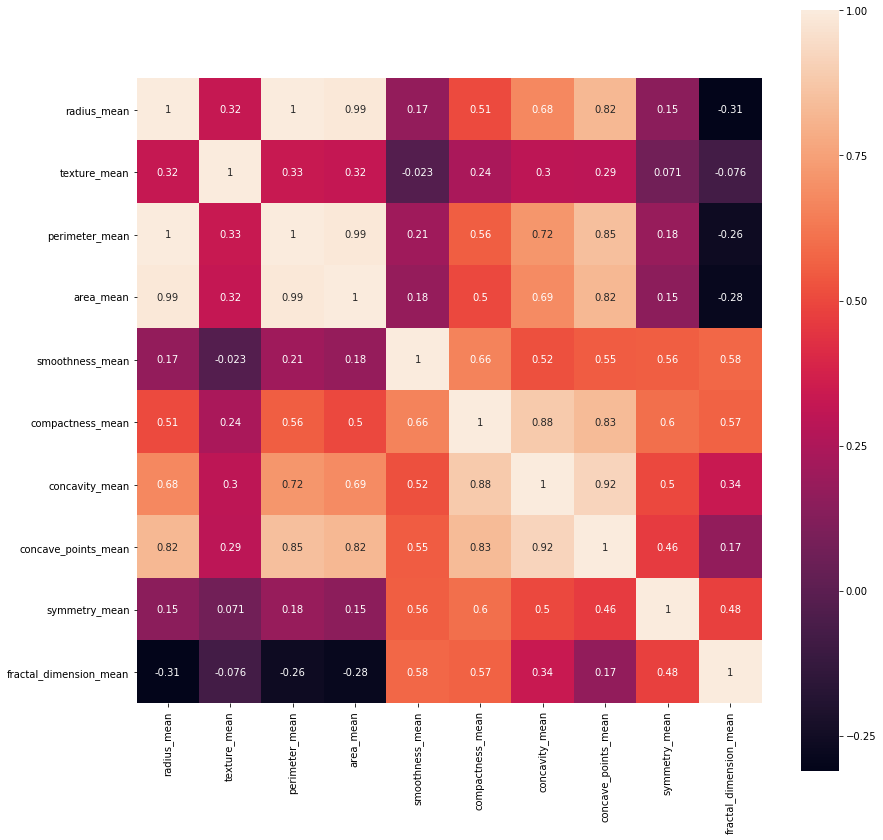

In [26]:
plt.figure(figsize=(14,14))
foo = sns.heatmap(data_mean.corr(), vmax=1, square = True, annot = True)

In [27]:
data_drop_list = ['radius_mean', 'perimeter_mean', 'concave_points_mean']
data_mean.drop(data_drop_list, inplace=True, axis=1)

/Users/hudsonps/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [28]:
data_mean.head()

,texture_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,symmetry_mean,fractal_dimension_mean
0,-2.073335,0.984375,1.568466,3.283515,2.652874,2.217515,2.255747
1,-0.353632,1.908708,-0.826962,-0.487072,-0.023846,0.001392,-0.868652
2,0.456187,1.558884,0.942210,1.052926,1.363478,0.939685,-0.398008
3,0.253732,-0.764464,3.283553,3.402909,1.915897,2.867383,4.910919
4,-1.151816,1.826229,0.280372,0.539340,1.371011,-0.009560,-0.562450


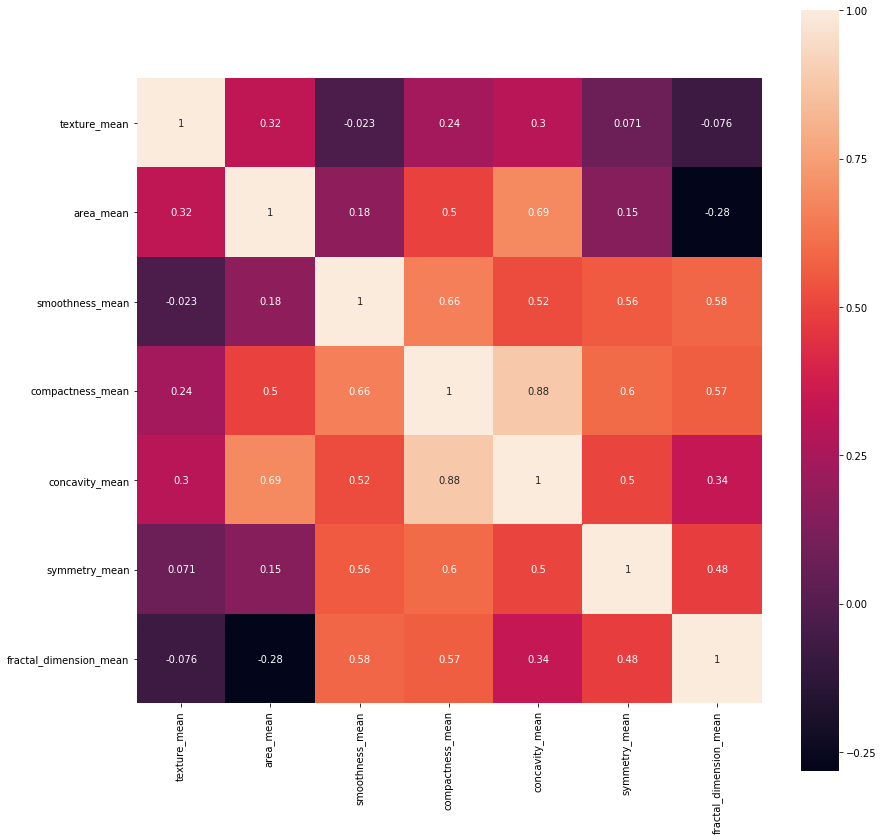

In [29]:
plt.figure(figsize=(14,14))
foo = sns.heatmap(data_mean.corr(), vmax=1, square = True, annot = True)

In [30]:
data_mean.diagnosis = data_scaled.diagnosis.copy()

In [31]:
data_mean.head()

,texture_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,symmetry_mean,fractal_dimension_mean
0,-2.073335,0.984375,1.568466,3.283515,2.652874,2.217515,2.255747
1,-0.353632,1.908708,-0.826962,-0.487072,-0.023846,0.001392,-0.868652
2,0.456187,1.558884,0.942210,1.052926,1.363478,0.939685,-0.398008
3,0.253732,-0.764464,3.283553,3.402909,1.915897,2.867383,4.910919
4,-1.151816,1.826229,0.280372,0.539340,1.371011,-0.009560,-0.562450


In [32]:
X_train, X_test, y_train, y_test = train_test_split(data_mean, data_scaled['diagnosis'], test_size = 0.2,random_state=0)

In [33]:
X_train.shape[0]

455

In [34]:
from sklearn.neighbors import KNeighborsClassifier

In [35]:
knn = KNeighborsClassifier()
scores = cross_val_score(knn, X_train, y_train, scoring = "accuracy", cv=10).mean()

In [36]:
print("The mean accuracy with 10-fold cross-validation for KNN is %s" %round(scores*100, 2))

The mean accuracy with 10-fold cross-validation for KNN is 95.37


In [37]:
from sklearn import tree
dt = tree.DecisionTreeClassifier()
scores = cross_val_score(dt, X_train, y_train, scoring = "accuracy", cv=10).mean()
print("The mean accuracy with 10-fold cross-validation for Decision Tree is %s" %round(scores*100, 2))

The mean accuracy with 10-fold cross-validation for Decision Tree is 90.75


In [38]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
scores = cross_val_score(rf, X_train, y_train, scoring = "accuracy", cv=10).mean()
print("The mean accuracy with 10-fold cross validations for Decision Tree is %s" %round(scores*100, 2))

The mean accuracy with 10-fold cross validations for Decision Tree is 93.42


In [39]:
for ind in range(1,21):
    knn2 = KNeighborsClassifier(n_neighbors = ind)
    scores = cross_val_score(knn2, X_train, y_train, scoring = "accuracy", cv=10).mean()
    print("N = "+ str(ind)+",  score = "+ str(round(scores*100, 2)))

N = 1,  score = 91.86
N = 2,  score = 92.53
N = 3,  score = 94.49
N = 4,  score = 94.71
N = 5,  score = 95.37
N = 6,  score = 94.71
N = 7,  score = 95.37
N = 8,  score = 94.05
N = 9,  score = 94.5
N = 10,  score = 94.05
N = 11,  score = 94.06
N = 12,  score = 94.07
N = 13,  score = 94.07
N = 14,  score = 93.86
N = 15,  score = 94.29
N = 16,  score = 93.86
N = 17,  score = 93.85
N = 18,  score = 93.64
N = 19,  score = 93.86
N = 20,  score = 94.08


In [40]:
from sklearn.ensemble import RandomForestClassifier
for ind in range(1,21):
    rf2 = RandomForestClassifier(n_estimators = ind)
    scores = cross_val_score(rf2, X_train, y_train, scoring = "accuracy", cv=10).mean()
    print("N = "+ str(ind)+",  score = "+ str(round(scores*100, 2)))

N = 1,  score = 87.9
N = 2,  score = 89.69
N = 3,  score = 89.88
N = 4,  score = 91.87
N = 5,  score = 90.8
N = 6,  score = 92.76
N = 7,  score = 94.3
N = 8,  score = 93.85
N = 9,  score = 92.98
N = 10,  score = 92.54
N = 11,  score = 92.98
N = 12,  score = 92.98
N = 13,  score = 94.29
N = 14,  score = 94.28
N = 15,  score = 93.18
N = 16,  score = 94.51
N = 17,  score = 94.52
N = 18,  score = 94.07
N = 19,  score = 94.29
N = 20,  score = 92.75


In [41]:
rf3 = RandomForestClassifier(n_estimators=17)
rf3 = rf3.fit(X_train, y_train)
predicted = rf3.predict(X_test)
acc_test = metrics.accuracy_score(y_test, predicted)

In [42]:
print(acc_test)

0.947368421053


In [43]:
#Saving a model

In [45]:
import pickle as pkl
pkl.dump(rf3, open("model1.pkl", "wb"))

In [46]:
type(rf3)

sklearn.ensemble.forest.RandomForestClassifier

In [48]:
rf3.predict([np.zeros(7)])

array([0])

In [54]:
y_train.shape

(455,)